In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings_data.csv to hotel_bookings_data.csv


In [3]:
df = pd.read_csv("hotel_bookings_data.csv")
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
92787,City Hotel,0,0,2018,September,29,10,2,0,1,...,0,No Deposit,9.0,NaN,0,Personal,134.00,0,0,Check-Out
83386,City Hotel,0,19,2018,March,5,30,0,1,1,...,0,No Deposit,9.0,NaN,0,Personal,73.90,0,1,Check-Out
17288,Resort Hotel,0,64,2017,November,40,29,0,4,2,...,1,No Deposit,240.0,NaN,0,Personal,92.35,0,2,Check-Out
18796,Resort Hotel,0,0,2017,February,52,22,0,1,2,...,1,No Deposit,NaN,NaN,0,Personal,43.00,0,0,Check-Out
42159,City Hotel,0,8,2017,November,36,1,0,3,3,...,0,No Deposit,13.0,NaN,0,Contract,156.50,0,4,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
x = ['children','city','agent','company']

for i in x:
  print(i + '=')
  print(df[i].value_counts())
  print('')

children=
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

city=
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

agent=
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

company=
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64



In [7]:
df.duplicated().sum()

33261

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().any()

False

# Handling Missing Value

In [10]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [11]:
childrennull = (df.isna().sum()/df.shape[0]*100)['children']
citynull = (df.isna().sum()/df.shape[0]*100)['city']
agentnull = (df.isna().sum()/df.shape[0]*100)['agent']
companynull = (df.isna().sum()/df.shape[0]*100)['company']

print(f'Children null : ', childrennull)
print(f'city null : ', citynull)
print(f'agent null : ', agentnull)
print(f'company null : ', companynull)

Children null :  0.004644196495953744
city null :  0.5224721057947962
agent null :  13.864087589545914
company null :  94.0670389764191


In [12]:
df['children'].fillna(0, inplace=True)

Mengisi nilai null pada kolom children dengan konstanta 0

In [13]:
df.dropna(inplace=True, subset='city')

Memutuskan untuk menghapus baris null pada kolom city dikarenakan data yang null tidak signifikan dengan data yang kita miliki, dimana hanya sekitar 0.41% missing value dari total keseluruhan data.

In [14]:
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

Karena pada kolom Agent dan Company tidak terdapat angka 0 (min : 1 dan max : 6) maka Missing value pada kolom Agent dan Company kita isi dengan angka 0 sebagai "undifined" value.

In [15]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Handling Invalid Value

In [16]:
df.meal.value_counts()

Breakfast     66678
No Meal        9435
Dinner         8769
Undefined       450
Full Board      347
Name: meal, dtype: int64

In [17]:
# Handling value that don't match
df['meal'] = df['meal'].replace(['Undefined'], 'No Meal')

Menggabungkan value Undefined dan No Meal karena memiliki arti yang sama

In [18]:
df.meal.value_counts()

Breakfast     66678
No Meal        9885
Dinner         8769
Full Board      347
Name: meal, dtype: int64

# Handling Unnecessary Value

In [19]:
df['total_guest'] = df['adults'] + df['children'] + df['babies']

In [20]:
df[['adults', 'children', 'babies','total_guest','customer_type']].sample(10)

,adults,children,babies,total_guest,customer_type
27711,2,0.0,0,2.0,Personal
98195,1,0.0,0,1.0,Personal
83014,1,0.0,0,1.0,Personal
20168,2,0.0,0,2.0,Personal
9790,2,0.0,0,2.0,Personal
35983,2,0.0,0,2.0,Family
6713,2,0.0,0,2.0,Personal
42845,2,0.0,0,2.0,Family
33548,3,0.0,0,3.0,Family
87759,2,1.0,0,3.0,Personal


In [21]:
df[df['total_guest'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Family,0.00,0,0,Check-Out,0.0
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Personal,0.00,0,0,Check-Out,0.0
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Family,0.00,0,0,Check-Out,0.0
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out,0.0
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2019,August,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Personal,100.80,0,0,Check-Out,0.0
115091,City Hotel,0,1,2019,August,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Personal,0.00,1,1,Check-Out,0.0
116251,City Hotel,0,44,2019,September,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Personal,73.80,0,0,Check-Out,0.0
116534,City Hotel,0,2,2019,September,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Family,22.86,0,1,Check-Out,0.0


In [22]:
# Menghapus data yang tidak memiliki tamu (total_guest = 0)
df1 = df[df['total_guest'] > 0].copy()

In [23]:
df1.shape

(85519, 30)

# Monthly Hotel Booking Analysis Based on Hotel Type

In [24]:
df = df1.copy()
df.shape

(85519, 30)

In [25]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
11474,Resort Hotel,1,16,2019,July,19,10,0,3,2,...,No Deposit,240.0,0.0,0,Personal,130.00,0,1,Canceled,4.0
88828,City Hotel,0,66,2018,July,20,8,2,3,2,...,No Deposit,9.0,0.0,0,Personal,119.85,0,1,Check-Out,2.0
266,Resort Hotel,0,78,2017,September,28,10,2,5,2,...,No Deposit,240.0,0.0,0,Personal,106.84,1,2,Check-Out,2.0


## Comparison of the number of hotel bookings each month by type of hotel

In [26]:
monthly_hotels = df.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','reservation_status':'count'}).reset_index()
monthly_hotels.columns = ['hotel', 'month', 'total_year', 'total_reservation']
monthly_hotels

,hotel,month,total_year,total_reservation
0,City Hotel,April,2,3546
1,City Hotel,August,2,4919
2,City Hotel,December,2,4047
3,City Hotel,February,2,2967
4,City Hotel,January,2,2873
5,City Hotel,July,2,5334
6,City Hotel,June,2,5027
7,City Hotel,March,2,2692
8,City Hotel,May,2,4798
9,City Hotel,November,2,4055


## Normalization

In [27]:
monthly_hotels['avg_reservation'] = round(monthly_hotels['total_reservation'] / monthly_hotels['total_year'])
monthly_hotels

,hotel,month,total_year,total_reservation,avg_reservation
0,City Hotel,April,2,3546,1773.0
1,City Hotel,August,2,4919,2460.0
2,City Hotel,December,2,4047,2024.0
3,City Hotel,February,2,2967,1484.0
4,City Hotel,January,2,2873,1436.0
5,City Hotel,July,2,5334,2667.0
6,City Hotel,June,2,5027,2514.0
7,City Hotel,March,2,2692,1346.0
8,City Hotel,May,2,4798,2399.0
9,City Hotel,November,2,4055,2028.0


## Sorting Data based on Month

In [28]:
mapping_month = {
    'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4,
    'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8, 'September' : 9, 
    'October' : 10, 'November' : 11, 'December' : 12
}
monthly_hotels['num_of_month'] = monthly_hotels['month'].map(mapping_month)
monthly_hotels = monthly_hotels[['hotel', 'num_of_month', 'month', 'total_year', 'total_reservation', 'avg_reservation']]
monthly_hotels = monthly_hotels.sort_values('num_of_month').reset_index(drop=True)
monthly_hotels

,hotel,num_of_month,month,total_year,total_reservation,avg_reservation
0,City Hotel,1,January,2,2873,1436.0
1,Resort Hotel,1,January,2,1988,994.0
2,City Hotel,2,February,2,2967,1484.0
3,Resort Hotel,2,February,2,2048,1024.0
4,City Hotel,3,March,2,2692,1346.0
5,Resort Hotel,3,March,2,1877,938.0
6,City Hotel,4,April,2,3546,1773.0
7,Resort Hotel,4,April,2,2420,1210.0
8,Resort Hotel,5,May,2,2559,1280.0
9,City Hotel,5,May,2,4798,2399.0


## Visualization

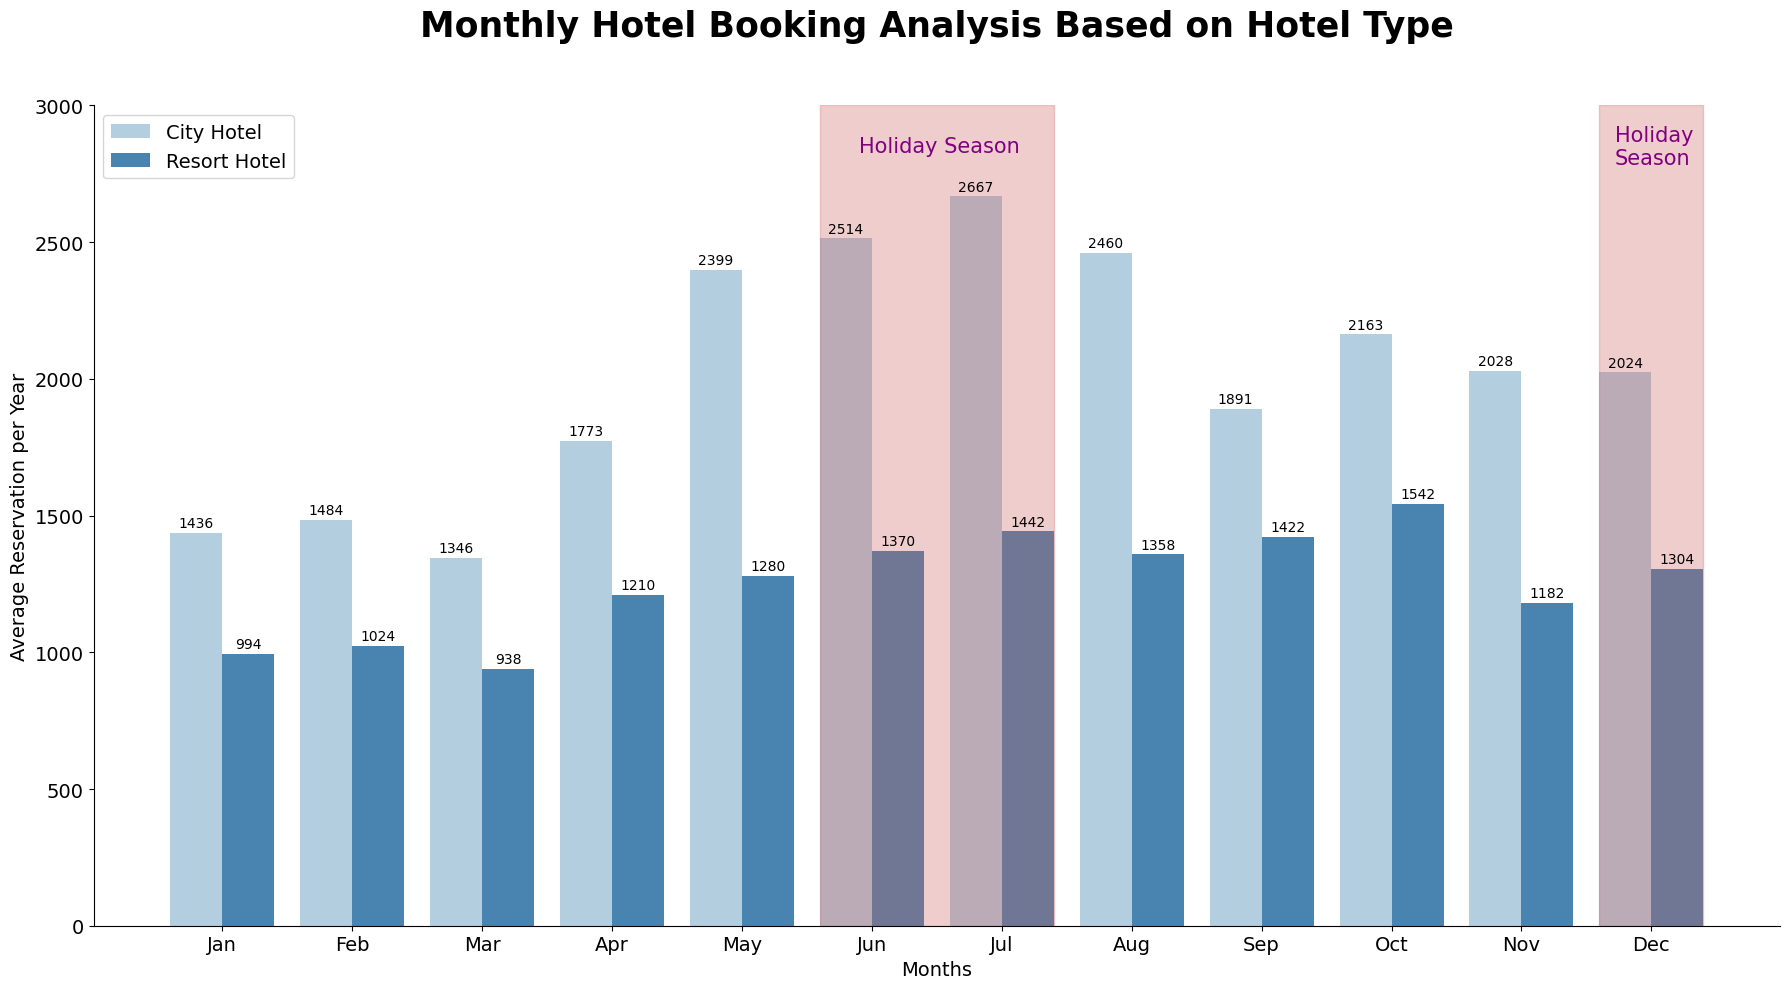

In [29]:
# Create figure
fig, ax = plt.subplots(figsize=(18,10))
# Plot graph
plt.title("Monthly Hotel Booking Analysis Based on Hotel Type", fontsize=25, color='black', weight='bold', pad=50)
sns.barplot(data=monthly_hotels, x='month', y='avg_reservation', hue='hotel', edgecolor='none', palette='Blues')

# Set label in x and y axis
plt.xlabel('Months', fontsize=14)
plt.xticks(np.arange(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Average Reservation per Year', fontsize=14)
plt.ylim(0, 3000)
plt.legend(loc='upper left', fontsize=14)
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

# Add value label to the bars
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

# Set First holiday season
plt.axvline(4,6, ls='--', color='purple')
plt.axvline(6,4, ls='--', color='purple')
plt.stackplot([4.6, 5.6, 6.4], [[3000]], color='indianred', alpha=0.3)
plt.text(x=4.90, y=2850, s='Holiday Season', fontsize=15, color='purple', va='center')

# # Set Second holiday season
plt.axvline(10,6, ls='--', color='purple')
plt.axvline(11,4, ls='--', color='purple')
plt.stackplot([10.6, 11.4], [[3000]], color='indianred', alpha=0.3)
plt.text(x=10.72, y=2850, s='Holiday \nSeason', fontsize=15, color='purple', va='center')


sns.despine()
plt.tight_layout()
plt.savefig('Monthly Hotel Booking Analysis Based on Hotel Type.png', dpi=200);

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

## Total duration of stay

In [30]:
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
# df = df[df['stay_duration'] > 0].copy()

In [31]:
df[['stays_in_weekend_nights','stays_in_weekdays_nights','stay_duration']].sample(3)

,stays_in_weekend_nights,stays_in_weekdays_nights,stay_duration
30529,0,2,2
28318,1,2,3
113351,2,1,3


In [32]:
df.stay_duration.value_counts()

3     17489
1     16688
2     15221
4     13362
7      7454
5      6683
6      3243
10     1067
8      1055
14      854
9       775
0       581
11      365
12      196
13      130
15       68
21       55
28       34
16       33
19       22
18       22
17       20
25       14
29       13
20       13
22       12
30       11
24        6
26        6
35        5
23        5
27        4
42        4
56        2
33        2
45        1
38        1
46        1
48        1
34        1
Name: stay_duration, dtype: int64

<Axes: xlabel='stay_duration', ylabel='Count'>

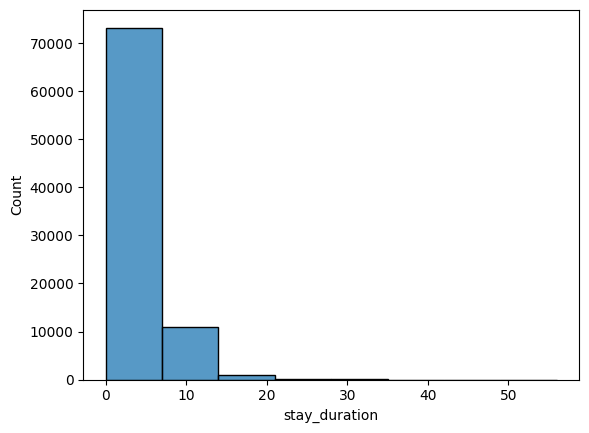

In [33]:
sns.histplot(data=df, x='stay_duration', binwidth=7)

In [34]:
max(df['stay_duration'])

56

## Grouping duration

In [35]:
sd = []
for v in df['stay_duration'] :
  if v >= 1 and v <= 7 :
    duration = '1 Week'
  elif v > 7 and v <= 14 :
    duration = '2 Weeks'
  elif v > 14 and v <= 21 :
    duration = '3 Weeks'
  elif v > 21 and v <= 28 :
    duration = '4 Weeks'
  else :
    duration = '5+ Weeks'
  sd.append(duration)

df['duration_group'] = sd

In [36]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration,duration_group
50780,City Hotel,1,18,2018,July,19,7,2,3,2,...,0.0,0,Personal,138.00,0,0,Canceled,2.0,5,1 Week
90780,City Hotel,0,6,2018,August,24,7,0,5,2,...,0.0,0,Personal,213.00,0,2,Check-Out,2.0,5,1 Week
111945,City Hotel,0,14,2019,July,20,14,2,2,2,...,0.0,0,Personal,150.48,0,2,Check-Out,2.0,4,1 Week


In [37]:
df['duration_group'].value_counts()

1 Week      80140
2 Weeks      4442
5+ Weeks      623
3 Weeks       233
4 Weeks        81
Name: duration_group, dtype: int64

## Comparison canceled hotel bookings to the duration of stay for each type of hotel

In [38]:
dfg = df.groupby(['hotel','is_canceled','duration_group'])['reservation_status'].count().reset_index()
dfg

,hotel,is_canceled,duration_group,reservation_status
0,City Hotel,0,1 Week,35843
1,City Hotel,0,2 Weeks,486
2,City Hotel,0,3 Weeks,27
3,City Hotel,0,4 Weeks,4
4,City Hotel,0,5+ Weeks,220
5,City Hotel,1,1 Week,15191
6,City Hotel,1,2 Weeks,523
7,City Hotel,1,3 Weeks,73
8,City Hotel,1,4 Weeks,21
9,City Hotel,1,5+ Weeks,31


In [39]:
df_cncl = pd.pivot_table(dfg,
                          index=['hotel','duration_group'],
                          columns=['is_canceled'],
                          values=['reservation_status']
                          ).reset_index()
df_cncl.columns = ['hotel','duration_group','no_cancel','canceled']
df_cncl['percentage'] = round((df_cncl['canceled'] / (df_cncl['canceled'] + df_cncl['no_cancel'])) * 100, 2)
df_cncl

,hotel,duration_group,no_cancel,canceled,percentage
0,City Hotel,1 Week,35843,15191,29.77
1,City Hotel,2 Weeks,486,523,51.83
2,City Hotel,3 Weeks,27,73,73.00
3,City Hotel,4 Weeks,4,21,84.00
4,City Hotel,5+ Weeks,220,31,12.35
5,Resort Hotel,1 Week,22274,6832,23.47
6,Resort Hotel,2 Weeks,2495,938,27.32
7,Resort Hotel,3 Weeks,86,47,35.34
8,Resort Hotel,4 Weeks,36,20,35.71
9,Resort Hotel,5+ Weeks,356,16,4.30


## Visualization

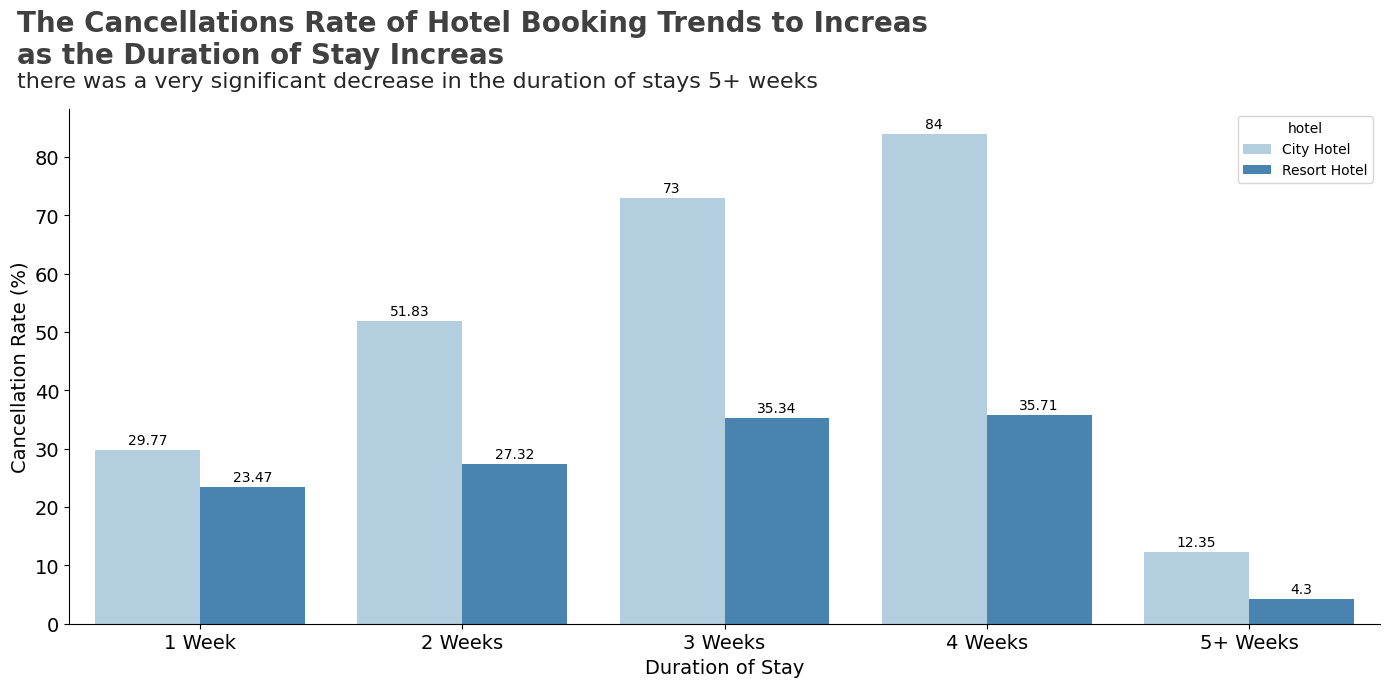

In [40]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.barplot(data=df_cncl, x='duration_group', y='percentage', hue='hotel', edgecolor='none', palette='Blues')
ax.bar_label(ax.containers[0], padding=2)
ax.bar_label(ax.containers[1], padding=2)

# ax.set_ylim(0,100)
ax.set_xlabel('Duration of Stay', fontsize=14)
ax.set_ylabel('Cancellation Rate (%)', fontsize=14)
ax.text(x=-0.7, y=96, s='The Cancellations Rate of Hotel Booking Trends to Increas \nas the Duration of Stay Increas',
        fontsize=20, weight='bold', alpha=.75)
ax.text(x=-0.7, y=92, s='there was a very significant decrease in the duration of stays 5+ weeks', 
        fontsize=16, alpha=.85)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

sns.despine()
plt.tight_layout()
plt.savefig('The Cancellation Rate of Hotel Booking.png', dpi=200);

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

## Create a new column that contains categorization of the booking time interval column

In [41]:
df.lead_time.value_counts()

0      5742
1      3123
2      1879
3      1679
4      1532
       ... 
411       1
737       1
371       1
532       1
463       1
Name: lead_time, Length: 479, dtype: int64

<Axes: xlabel='lead_time', ylabel='Count'>

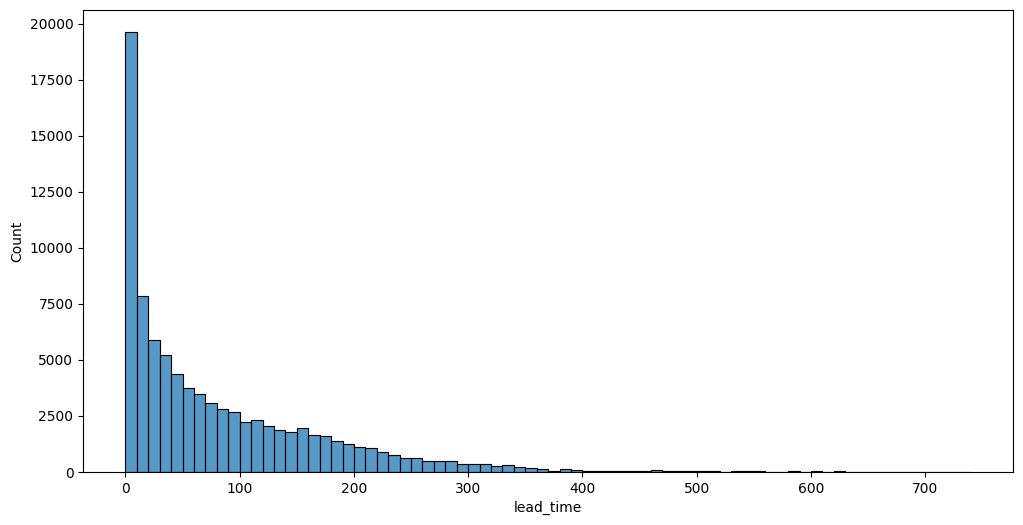

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='lead_time', binwidth=10)

In [43]:
max(df['lead_time'])

737

In [44]:
# pengelompokkan data agar lebih sederhana
ld = []
for i in df['lead_time']:
  if i>=0 and i<=90:
    waiting = '1-3 Months'
  elif i>90 and i<=180:
    waiting = '4-6 Months'
  elif i>180 and i<=270:
    waiting = '7-9 Months'
  elif i>270 and i<=360:
    waiting = '10-12 Months'
  else:
    waiting = '12+ Months'
  ld.append(waiting)

df['lead_time_group'] = ld

In [45]:
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,stay_duration,duration_group,lead_time_group
92981,City Hotel,0,175,2018,September,29,13,0,2,2,...,0,Personal,96.30,0,1,Check-Out,2.0,2,1 Week,4-6 Months
82513,City Hotel,0,65,2017,February,53,30,0,2,2,...,0,Personal,113.40,0,1,Check-Out,2.0,2,1 Week,1-3 Months
16817,Resort Hotel,0,111,2017,November,37,10,1,3,2,...,0,Personal,109.65,0,0,Check-Out,2.0,4,1 Week,4-6 Months


## Comparison of the number of canceled hotel bookings against the time interval of bookings for each type of hotel

In [46]:
dfg1 = df.groupby(['hotel','is_canceled','lead_time_group'])['reservation_status'].count().reset_index()
dfg1

,hotel,is_canceled,lead_time_group,reservation_status
0,City Hotel,0,1-3 Months,26114
1,City Hotel,0,10-12 Months,596
2,City Hotel,0,12+ Months,172
3,City Hotel,0,4-6 Months,7175
4,City Hotel,0,7-9 Months,2523
5,City Hotel,1,1-3 Months,8912
6,City Hotel,1,10-12 Months,744
7,City Hotel,1,12+ Months,199
8,City Hotel,1,4-6 Months,4166
9,City Hotel,1,7-9 Months,1818


In [47]:
leadtime_canceled = pd.pivot_table(dfg1,
                                   index=['hotel','lead_time_group'],
                                   columns=['is_canceled'],
                                   values=['reservation_status']
                                   ).reset_index()
leadtime_canceled.columns = ['hotel', 'lead_month', 'no_cancel', 'canceled']
leadtime_canceled['percentage'] = round((leadtime_canceled['canceled'] / 
                                         (leadtime_canceled['canceled'] + leadtime_canceled['no_cancel'])) 
                                         * 100, 2)
leadtime_canceled

,hotel,lead_month,no_cancel,canceled,percentage
0,City Hotel,1-3 Months,26114,8912,25.44
1,City Hotel,10-12 Months,596,744,55.52
2,City Hotel,12+ Months,172,199,53.64
3,City Hotel,4-6 Months,7175,4166,36.73
4,City Hotel,7-9 Months,2523,1818,41.88
5,Resort Hotel,1-3 Months,17289,3895,18.39
6,Resort Hotel,10-12 Months,892,553,38.27
7,Resort Hotel,12+ Months,204,43,17.41
8,Resort Hotel,4-6 Months,4462,2123,32.24
9,Resort Hotel,7-9 Months,2400,1239,34.05


In [48]:
mapping_interval = {
    '1-3 Months' : 0, '4-6 Months' : 1, '7-9 Months' : 2, 
    '10-12 Months' : 3, '12+ Months' : 4
}
leadtime_canceled['num_of_interval'] = leadtime_canceled['lead_month'].map(mapping_interval)
leadtime_canceled = leadtime_canceled[['hotel','num_of_interval', 'lead_month','no_cancel','canceled','percentage']]
leadtime_canceled = leadtime_canceled.sort_values('num_of_interval').reset_index(drop=True)
leadtime_canceled

,hotel,num_of_interval,lead_month,no_cancel,canceled,percentage
0,City Hotel,0,1-3 Months,26114,8912,25.44
1,Resort Hotel,0,1-3 Months,17289,3895,18.39
2,City Hotel,1,4-6 Months,7175,4166,36.73
3,Resort Hotel,1,4-6 Months,4462,2123,32.24
4,City Hotel,2,7-9 Months,2523,1818,41.88
5,Resort Hotel,2,7-9 Months,2400,1239,34.05
6,City Hotel,3,10-12 Months,596,744,55.52
7,Resort Hotel,3,10-12 Months,892,553,38.27
8,City Hotel,4,12+ Months,172,199,53.64
9,Resort Hotel,4,12+ Months,204,43,17.41


## Visualization

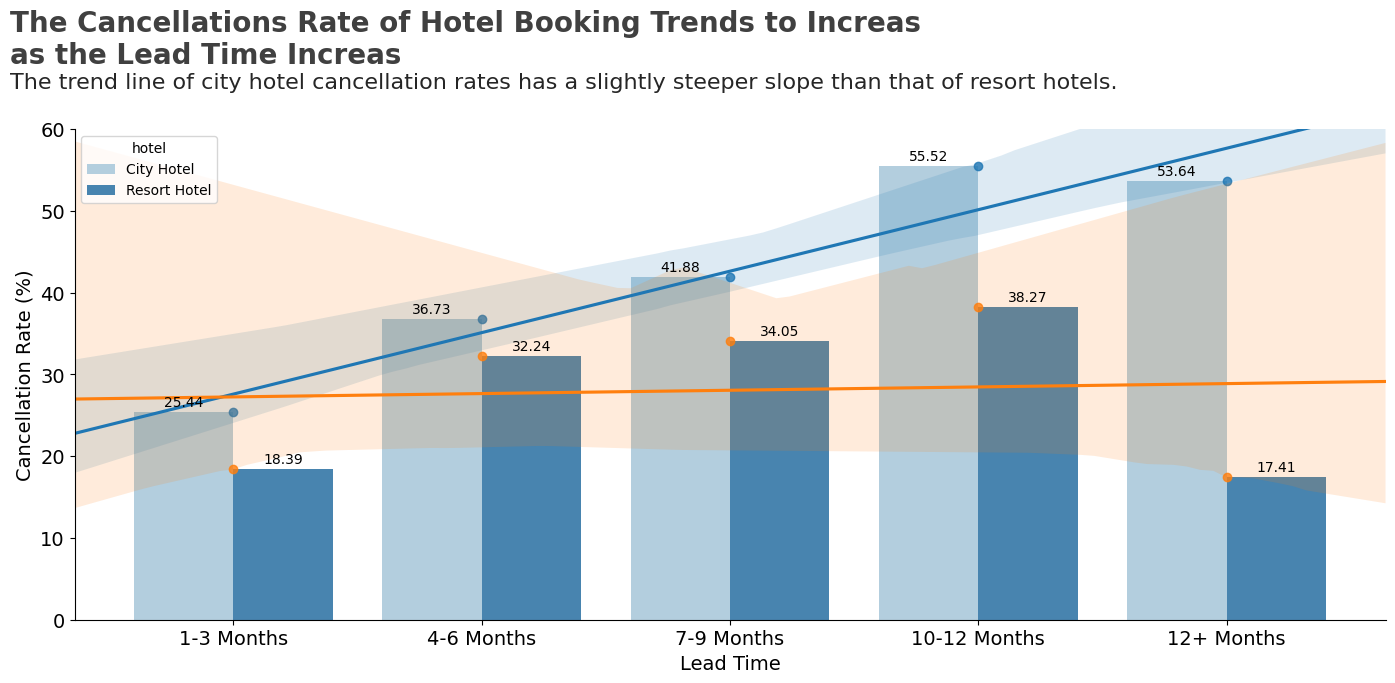

In [49]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.barplot(x='lead_month', y='percentage', hue='hotel', data=leadtime_canceled, palette='Blues')
sns.regplot(x='num_of_interval', y='percentage', data=leadtime_canceled[leadtime_canceled['hotel'] == 'City Hotel'],
            label='City Hotel', truncate=False)
sns.regplot(x='num_of_interval', y='percentage', data=leadtime_canceled[leadtime_canceled['hotel'] == 'Resort Hotel'],
            label='Resort Hotel', truncate=False)

ax.text(x=-0.9, y=68, s='The Cancellations Rate of Hotel Booking Trends to Increas \nas the Lead Time Increas',
        fontsize=20, weight='bold', alpha=.75)
ax.text(x=-0.9, y=65, s='The trend line of city hotel cancellation rates has a slightly steeper slope than that of resort hotels.', 
        fontsize=16, alpha=.85)

ax.bar_label(ax.containers[0], padding=2)
ax.bar_label(ax.containers[1], padding=2)

ax.set_xlabel('Lead Time', fontsize=14)
ax.set_ylabel('Cancellation Rate (%)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylim(0, 60)

sns.despine()
plt.tight_layout()

plt.savefig('The Cancellation Rate of Late Time.png', dpi=200);